In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import random


from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [2]:
df_train = pd.read_csv(r"C:\Users\faruk\Downloads\mnist_train.csv")
df_test = pd.read_csv(r"C:\Users\faruk\Downloads\mnist_test.csv")

df_train.tail()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Convert the training data to numpy arrays 
X_train = np.array(df_train.iloc[:, 1:]) 
X_test = np.array(df_test.iloc[:, 1:])

In [4]:
# If you need to get the labels (first column) 
y_train = np.array(df_train.iloc[:, 0]) 
y_test = np.array(df_test.iloc[:, 0])
y_train

array([0, 4, 1, ..., 5, 6, 8], dtype=int64)

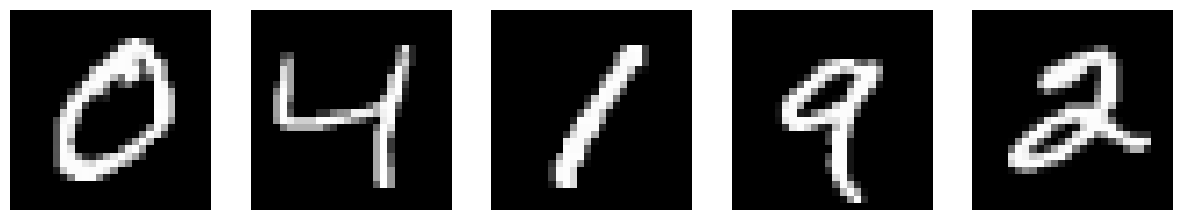

In [5]:
num_images_to_display = 5  # we will display 5 images
images = X_train[:num_images_to_display]

# Function to plot images
def plot_image(image, ax):
    ax.imshow(image, cmap='gray')
    ax.axis('off')

# Plot the images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i, ax in enumerate(axes):
    image = images[i].reshape(28, 28)
    plot_image(image, ax)

plt.show()


In [6]:
# Starndard Scaling
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [7]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
X_train = np.array(df_train.iloc[:, 1:])
X_test = np.array(df_test.iloc[:, 1:])
y_train = np.array(df_train.iloc[:, 0])
y_test = np.array(df_test.iloc[:, 0])

# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few scaled values
print("First 5 rows of scaled X_train:\n", X_train_scaled[:5])
print("First 5 rows of scaled X_test:\n", X_test_scaled[:5])


First 5 rows of scaled X_train:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 5 rows of scaled X_test:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# model GN
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_train_scaled, y_train)


GaussianNB()

In [10]:
# pred
y_pred = gaussian_classifier.predict(X_test_scaled)


In [11]:
# Classification report
print(metrics.classification_report(y_test, y_pred))

# Accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.76      0.84      0.80       980
           1       0.89      0.94      0.91      1135
           2       0.90      0.18      0.29      1032
           3       0.65      0.28      0.39      1010
           4       0.86      0.13      0.23       982
           5       0.45      0.03      0.06       892
           6       0.69      0.92      0.79       958
           7       0.88      0.20      0.32      1027
           8       0.25      0.70      0.37       974
           9       0.36      0.95      0.53      1009

    accuracy                           0.52      9999
   macro avg       0.67      0.52      0.47      9999
weighted avg       0.68      0.52      0.48      9999

Model Accuracy: 0.52


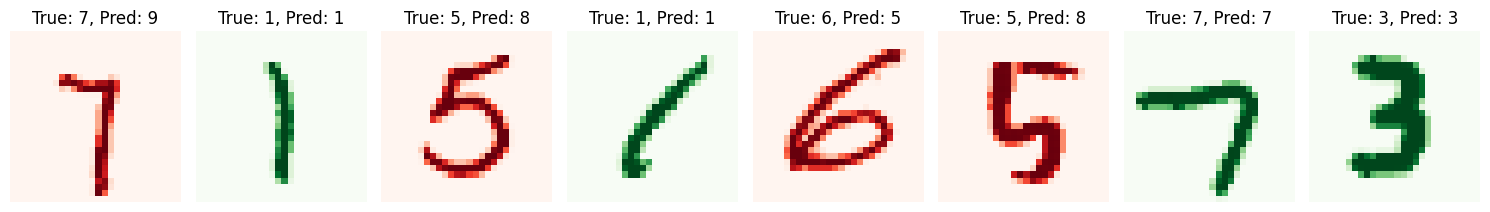

In [12]:
def plot_image(image, ax, title, cmap):
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
    ax.set_title(title)
num_samples_to_display = 8  # Set the number of samples to display
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 3))

for ax in axes:
    random_index = random.randint(0, X_test.shape[0] - 1)
    sample = X_test[random_index, :].reshape(28, 28)
    true_label = y_test[random_index]
    predicted_label = y_pred[random_index]
    title = f'True: {true_label}, Pred: {predicted_label}'
    cmap = 'Greens' if true_label == predicted_label else 'Reds'
    plot_image(sample, ax, title, cmap)

plt.tight_layout()
plt.show()


In [13]:
# Create the MLP classifier
MLP_classifier = MLPClassifier(random_state=42)

# Train the classifier on the scaled training data
MLP_classifier.fit(X_train_scaled, y_train)


MLPClassifier(random_state=42)

In [14]:
y_pred_mlp = MLP_classifier.predict(X_test_scaled)


In [15]:
# Classification report
print(metrics.classification_report(y_test, y_pred_mlp))

# Accuracy score
accuracy_mlp = metrics.accuracy_score(y_test, y_pred_mlp)
print(f"Model Accuracy: {accuracy_mlp:.2f}")

# Confusion matrix
confusion_matrix_mlp = metrics.confusion_matrix(y_test, y_pred_mlp)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1027
           8       0.96      0.97      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97      9999
   macro avg       0.97      0.97      0.97      9999
weighted avg       0.98      0.97      0.98      9999

Model Accuracy: 0.97


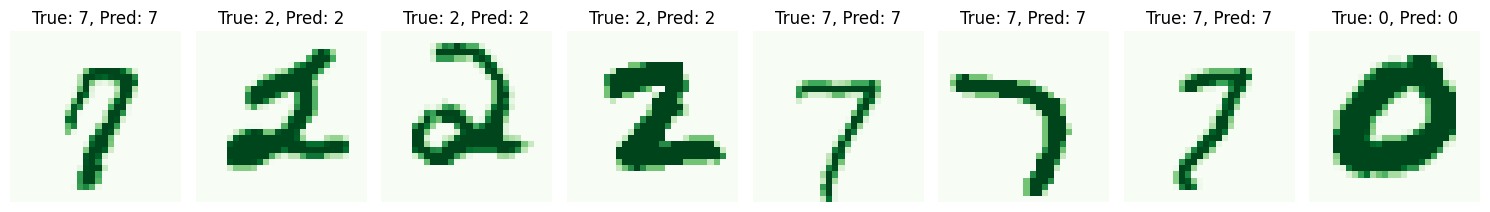

In [16]:
def plot_image(image, ax, title, cmap):
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
    ax.set_title(title)
num_samples_to_display = 8  # Set the number of samples to display
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 3))

for ax in axes:
    random_index = random.randint(0, X_test.shape[0] - 1)
    sample = X_test[random_index, :].reshape(28, 28)
    true_label = y_test[random_index]
    predicted_label = y_pred_mlp[random_index]
    title = f'True: {true_label}, Pred: {predicted_label}'
    cmap = 'Greens' if true_label == predicted_label else 'Reds'
    plot_image(sample, ax, title, cmap)

plt.tight_layout()
plt.show()
